In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
from astropy.io import fits
from astropy import units as u

In [69]:
from astropy import coordinates

In [3]:
x = fits.open('../externaldata/g107.2_cgps408.fits')

In [6]:
x[0].header

SIMPLE  =                    T          / STANDARD FITS TAPE                    
BITPIX  =                  -32          / IEEE FLOATING POINT                   
NAXIS   =                    4          / NUMBER OF AXES                        
NAXIS1  =                  256          / # PIXELS PER ROW (E.G. RA)            
NAXIS2  =                  256          / # ROWS (E.G. DEC)                     
NAXIS3  =                    1          / THIRD COORDINATE                      
NAXIS4  =                    1          / STOKES (BEAM=0,I,Q,U,V,OTHER=5)       
                                                                                
                                                                                
BLOCKED =                    T          / TAPE MAY BE BLOCKED                   
                                                                                
                                                                                
                            

In [43]:
hdu = x[0]

In [44]:
hdu.data

array([[[[ 266.40979004,  207.75965881,  118.0732193 , ...,   57.50211716,
            58.27594376,   58.60501862],
         [ 225.62294006,  177.37904358,  103.29437256, ...,   58.03803253,
            58.55016708,   58.42208481],
         [ 159.15603638,  126.66706085,   82.090271  , ...,   58.52991486,
            58.77724838,   58.28602982],
         ..., 
         [  49.20767975,   49.2965126 ,   50.13554001, ...,   50.19137955,
            50.01976776,   49.28020859],
         [  48.81433868,   49.16584778,   50.00775909, ...,   50.5840683 ,
            50.43182373,   49.67471695],
         [  48.65539169,   49.07363892,   49.74625397, ...,   51.008564  ,
            51.06331635,   50.38702011]]]], dtype=float32)

In [45]:
1./60

0.016666666666666666

In [46]:
hdu.header

SIMPLE  =                    T          / STANDARD FITS TAPE                    
BITPIX  =                  -32          / IEEE FLOATING POINT                   
NAXIS   =                    4          / NUMBER OF AXES                        
NAXIS1  =                  256          / # PIXELS PER ROW (E.G. RA)            
NAXIS2  =                  256          / # ROWS (E.G. DEC)                     
NAXIS3  =                    1          / THIRD COORDINATE                      
NAXIS4  =                    1          / STOKES (BEAM=0,I,Q,U,V,OTHER=5)       
                                                                                
                                                                                
BLOCKED =                    T          / TAPE MAY BE BLOCKED                   
                                                                                
                                                                                
                            

In [50]:
lons = (np.arange(256) - hdu.header['CRPIX1']) * hdu.header['CDELT1'] + hdu.header['CRVAL1']

In [51]:
lats = (np.arange(256) - hdu.header['CRPIX2']) * hdu.header['CDELT2'] + hdu.header['CRVAL2']

In [53]:
hdu.data.shape

(1, 1, 256, 256)

In [54]:
cgps = hdu.data[0][0]

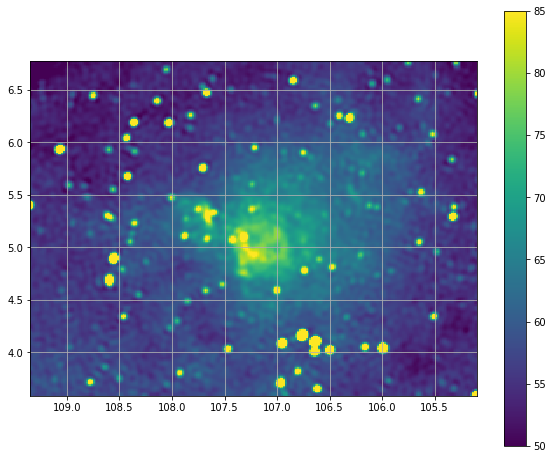

In [56]:
figsize(10, 8)
imshow(cgps[::-1, ::-1], extent=(lons[0], lons[-1], lats[0], lats[-1]))
colorbar()
clim(50, 85)
grid()

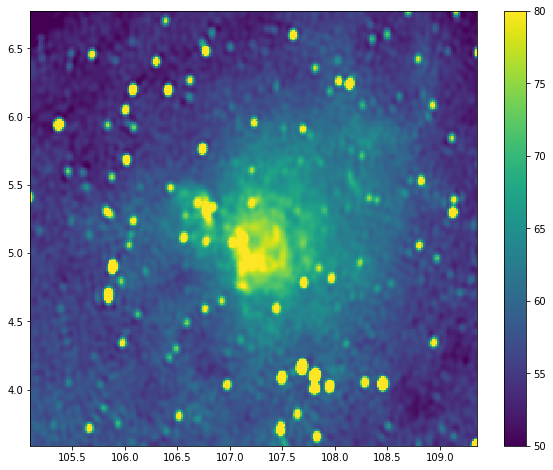

In [62]:
pcolormesh(lons, lats, cgps)
clim(50, 80)
colorbar()

In [76]:
pointing = coordinates.SkyCoord('galactic', l=lons*u.deg, b=lats*u.deg, equinox='1950')

In [78]:
p2 = coordinates.SkyCoord(pointing, equinox='2000')

ValueError: Coordinate attribute 'equinox'='1950' conflicts with keyword argument 'equinox'='2000'

In [79]:
pointing.l.deg

array([ 109.34999991,  109.33333325,  109.31666658,  109.29999992,
        109.28333325,  109.26666658,  109.24999992,  109.23333325,
        109.21666659,  109.19999992,  109.18333325,  109.16666659,
        109.14999992,  109.13333326,  109.11666659,  109.09999992,
        109.08333326,  109.06666659,  109.04999993,  109.03333326,
        109.01666659,  108.99999993,  108.98333326,  108.9666666 ,
        108.94999993,  108.93333326,  108.9166666 ,  108.89999993,
        108.88333327,  108.8666666 ,  108.84999993,  108.83333327,
        108.8166666 ,  108.79999994,  108.78333327,  108.7666666 ,
        108.74999994,  108.73333327,  108.71666661,  108.69999994,
        108.68333327,  108.66666661,  108.64999994,  108.63333328,
        108.61666661,  108.59999994,  108.58333328,  108.56666661,
        108.54999995,  108.53333328,  108.51666661,  108.49999995,
        108.48333328,  108.46666662,  108.44999995,  108.43333328,
        108.41666662,  108.39999995,  108.38333329,  108.36666

In [63]:
z = {'lons':lons, 'lats':lats, 'signal':cgps}

In [64]:
np.savez('../externaldata/cgps', **z)

In [65]:
lons.min()

105.100000084

In [66]:
lons.max()

109.34999991400001

In [67]:
lats.min()

3.5875004290000003

In [68]:
lats.max()

6.7750001740000005